In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data collection and processing

In [220]:
df=pd.read_csv(r"C:\Users\Nomitech\Desktop\Machine learning\car data.csv")

In [221]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [222]:
#Checking number of rows and columns

In [223]:
df.shape

(301, 9)

In [224]:
#getting some information about the dataset

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [226]:
#Checking the number of missing values


In [227]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [228]:
#Checning the distribution of categorical data

<AxesSubplot:>

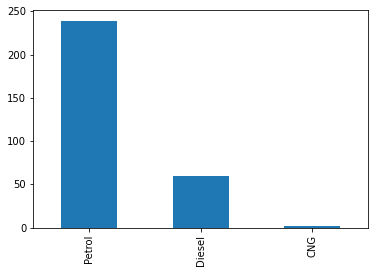

In [229]:
df['Fuel_Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

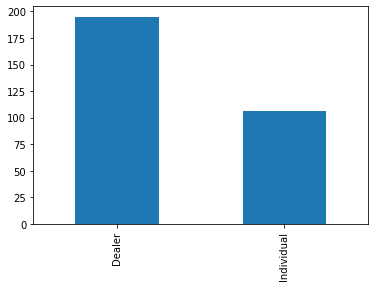

In [230]:
df['Seller_Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

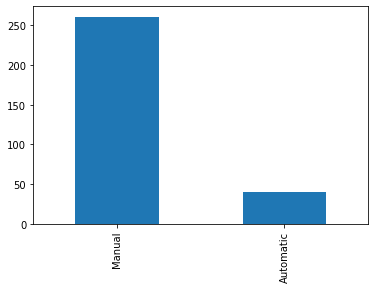

In [231]:
df['Transmission'].value_counts().plot(kind='bar')

In [232]:
#Encoding Categorical Data

In [233]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [234]:
#encoding the Fuel Type
df['Fuel_Type']=df['Fuel_Type'].replace({"Petrol":0,"Diesel":1,'CNG':2})

#encoding Transmission Type
df['Transmission']=df['Transmission'].replace({"Manual":0,"Automatic":1})

#Encoding Seller Type
df['Seller_Type']=df['Seller_Type'].replace({"Dealer":0,"Individual":1})

In [235]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the Data into training and test data

In [236]:
x = df.drop(['Car_Name',"Selling_Price"],axis=1)
y = df['Selling_Price']

In [237]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [238]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [240]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


In [241]:
x_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0
290,2014,6.400,19000,0,0,0,0
35,2011,7.740,49998,2,0,0,0
7,2015,8.610,33429,1,0,0,0
183,2013,0.470,21000,0,1,0,0
13,2015,7.710,26000,0,0,0,0


In [242]:
##loading the linear regression model
regressor = LinearRegression()

In [243]:
regressor.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [244]:
training_data_prediction = regressor.predict(x_train)

In [245]:
# R Squared Error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared  Error : ", error_score)


R squared  Error :  0.8799451660493698


In [246]:
error_score2 = metrics.r2_score(y_test,regressor.predict(x_test))

In [247]:
error_score2

0.8365766715026905

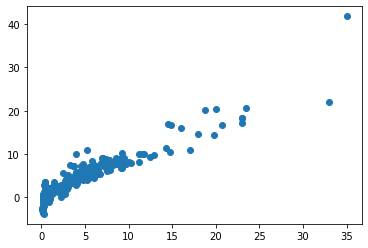

In [248]:
plt.scatter(y_train,training_data_prediction)
#the historicalprices are very close to the predicted ones

In [249]:
##prediction on test data

In [250]:

test_data_prediction  = regressor.predict(x_test)


In [251]:
error_score2 = metrics.r2_score(y_test,test_data_prediction)

In [252]:
error_score2

0.8365766715026905

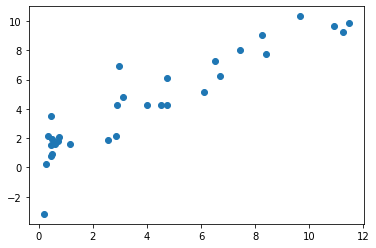

In [253]:
plt.scatter(y_test,test_data_prediction)

In [254]:
##Lasso Regression

In [255]:
lass_reg_model = Lasso()

In [257]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [260]:
training_data_prediction = lass_reg_model.predict(x_train)

In [262]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("Lasso Prediction: ", error_score)


Lasso Prediction:  0.8427856123435794
